## INTRODUCTION TO REGRESSION
Machine learning models algorithms allows computer automate tasks that would otherwise take manual efforts, time as awell as resources, it learns to interpret data to provide insight to humans

## SUPERVISED MACHINE LEARNING

1. Regression: Our target has continous values e.g predict prices of houses 
2. Classification: Our target has discrete values e.g predict the 

## Linear Regression

This is saying that there is a linear relationship between your features and your targets. your Y is your target, dependent variable and X is your independent variable. e.g predicting an employees salary, the employees salary will be the dependent variable and the features you use to predict the salry will be your independent variable. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#Creating a list with 6 rows and 2 columns
data= [[-1,-1],[1,2],[2,3],[4,3],[6,5],[7,8]]
data


[[-1, -1], [1, 2], [2, 3], [4, 3], [6, 5], [7, 8]]

In [22]:
#Converting list to an array 
#Option 1 creating pandas 
dataset=pd.DataFrame(data, columns=['x','y'])
dataset


,x,y
0,-1,-1
1,1,2
2,2,3
3,4,3
4,6,5
5,7,8


In [23]:
dataset=pd.DataFrame(data, columns=['x','y'])
dataset

print(dataset)
print('Datatype of X and Y : ', type(dataset))
                     
#split the dataset into feature and target
x= dataset.iloc[:, :-1].values 
y=dataset.iloc[:, 1].values
print('\n Input Feature X = ', x, '\n The shape of X = ', x.shape, '\n Output(Y) = ', y, '\n The shape of y = ', y.shape)
print('Datatype of X and Y: ',type(x), type(y))

   x  y
0 -1 -1
1  1  2
2  2  3
3  4  3
4  6  5
5  7  8
Datatype of X and Y :  <class 'pandas.core.frame.DataFrame'>

 Input Feature X =  [[-1]
 [ 1]
 [ 2]
 [ 4]
 [ 6]
 [ 7]] 
 The shape of X =  (6, 1) 
 Output(Y) =  [-1  2  3  3  5  8] 
 The shape of y =  (6,)
Datatype of X and Y:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [24]:
y.shape

(6,)

In [25]:
x.shape

(6, 1)

In [26]:
type(x)

numpy.ndarray

In [27]:
type(y)

numpy.ndarray

## Model Training



In [28]:
#fitting the linear regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [29]:
regressor.score(x,y)


0.8981055055474146

In [30]:
#intercept
print(regressor.intercept_)

0.38078291814946663


In [31]:
regressor.coef_

array([0.93238434])

## Interpretation of Linear regression coefficient

In [34]:
cor=dataset.corr()

print(cor)

          x         y
x  1.000000  0.947684
y  0.947684  1.000000


the equation is therefore
y= coefficient of X + intercept

yhat= 0.9324x + 0.38078

## Model Testing

In [36]:
#testing with predicted values
y_pred= regressor.predict(x)

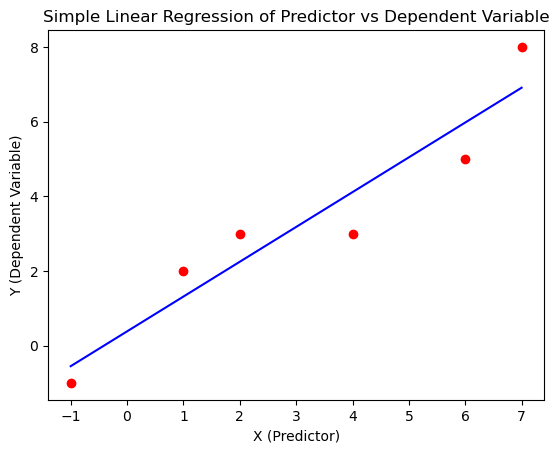

In [38]:
plt.scatter(x,y, color='red') #scatterplot

plt.plot(x, regressor.predict(x), color='blue')#lineplot of x vs y

plt.title('Simple Linear Regression of Predictor vs Dependent Variable')
plt.xlabel('X (Predictor)')
plt.ylabel('Y (Dependent Variable)')
plt.show()

## Assignment

Find the mean square error, root mean square and the mean absolute error of the data without using sklearn

In [46]:
dataset['yhat']= y_pred
#doing the assignment
dataset['y_diff']= y-y_pred
dataset['y_diff_squared']=dataset['y_diff']**2



dataset

,x,y,yhat,y_diff,y_diff_squared
0,-1,-1,-0.551601,-0.448399,0.201061
1,1,2,1.313167,0.686833,0.471739
2,2,3,2.245552,0.754448,0.569192
3,4,3,4.110320,-1.110320,1.232811
4,6,5,5.975089,-0.975089,0.950798
5,7,8,6.907473,1.092527,1.193615


In [48]:
#Finding the answers

mae=abs(dataset['y_diff']).sum()
n=len(dataset)
mean_absolute_error=mae/n
mse=abs(dataset['y_diff_squared']).sum()
mean_squared_error=mse/n
rmse=np.sqrt(mean_squared_error)
print('Mean Absolute Error: ', mean_absolute_error)
print('Mean Squared Error: ', mean_squared_error )
print('Root Mean Squared Error: ', rmse)


Mean Absolute Error:  0.8446026097271649
Mean Squared Error:  0.7698695136417557
Root Mean Squared Error:  0.8774220840859636


In [41]:
result = dataset[['y', 'yhat']]

In [42]:
n=len(dataset)
#error from each prediction
result['error']= dataset['y'].subtract(dataset['yhat'])

print(result)

#summation of all error functions from all predictions

cost_function=abs(result['error']).sum()

Mean_Absolute_Error = cost_function/n

print()

print(cost_function)
print(Mean_Absolute_Error)

   y      yhat     error
0 -1 -0.551601 -0.448399
1  2  1.313167  0.686833
2  3  2.245552  0.754448
3  3  4.110320 -1.110320
4  5  5.975089 -0.975089
5  8  6.907473  1.092527

5.06761565836299
0.8446026097271649


C:\Users\OMODOLAPO ADEDEJI\AppData\Local\Temp\ipykernel_5664\3985982172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['error']= dataset['y'].subtract(dataset['yhat'])


## Using SKLEARN REGRESSION METRICS

In [43]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y,y_pred)))


Mean Absolute Error:  0.8446026097271649
Mean Squared Error:  0.7698695136417557
Root Mean Squared Error:  0.8774220840859636


## Polynomial Regression

Its a form of regression which helps to transform the input( independent variable x) to a polynomial state such that you can use it for a data that does not have a linear relationship for a better fit when visualising the data

In [49]:
#importing polynomial features cllass from sklearn

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) #Degree depicts the curves
x_poly = poly_reg.fit_transform(x)

In [50]:
regressor_2 = LinearRegression()
regressor_2.fit(x_poly, y)

LinearRegression()

In [51]:
regressor_2.score(x_poly, y)

0.99828352180937

In [52]:
Poly_pred = regressor_2.predict(poly_reg.fit_transform(x))

In [53]:
print('regression intercept= ', regressor_2.intercept_)

regression intercept=  0.8507269789983924


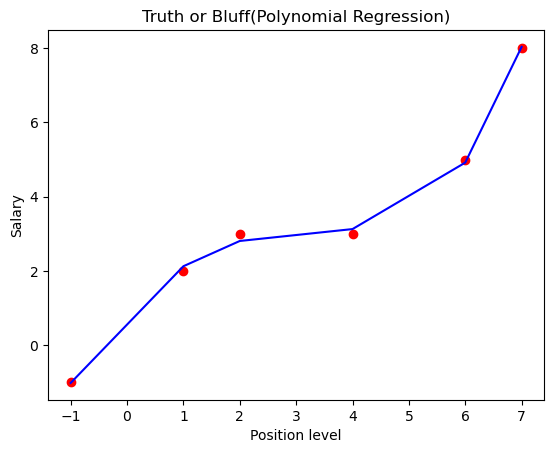

In [55]:
#Visualising the polynomial regression result

plt.scatter(x,y, color='red')
plt.plot(x, regressor_2.predict(poly_reg.fit_transform(x)), color='blue')
plt.title('Truth or Bluff(Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Classification
Classification is used to predict a category a data belongs to i,e we use it to predict labels
1. Spam Detection
2. Churn Prediction
3. Sentiment Analysis
4. Dog Breed Detection

# Types of classification task
Binary classification: email spam detection, (1 -> spam, 0-> not spam)

Multiclass Classification: digit recognition, prediciting a party that wins the elections

# Classification Algorithms
1. Logistic Regression
2. Naive Bayes
3. 

## Import Modules


In [56]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [57]:
dt= pd.read_csv('Downloads/Social_Network_Ads.csv', delimiter=",")
dt.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [59]:
dt['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [60]:
dt['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Preprocessing Data

In [62]:
#creating a label encoder object

from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
#invoking fit_transform method on object
dt['Gender']=le.fit_transform(dt['Gender'])


In [63]:
dt['Gender'].value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [65]:
dt.shape

(400, 5)

## Exploratory Analysis

In [64]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int32
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB


In [66]:
left=dt.groupby('Purchased')
left.mean()

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,1.569116e+07,0.505837,32.793774,60544.747082
1,1.569222e+07,0.461538,46.391608,86272.727273


In [67]:
dt.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [68]:
dt.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Data Visualisation

In [69]:
left_count=left.count()

left_count

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,257,257,257,257
1,143,143,143,143


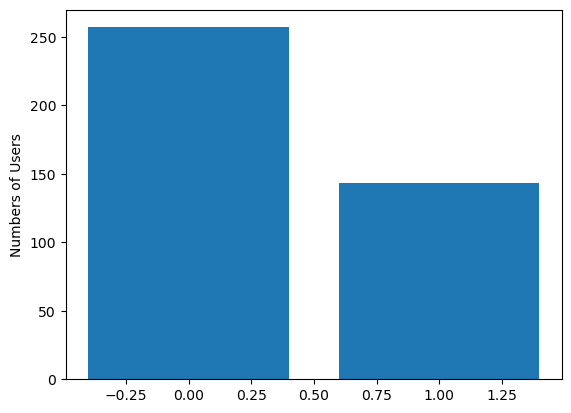

In [72]:
#How many users are in each category
#User Id
plt.bar(left_count.index.values, left_count['User ID'])
plt.ylabel('Numbers of Users')
plt.show()

## Feature Engineering

In [77]:
dt['Age Category']=['iGen' if 0<age<25 else 'Millenials' if 24 <age< 40 else 'GenX' if 39<age<56 else 'BabyBooners' if 55<age<74 else None 
                   for age in list(dt['Age'].values)]

In [78]:
dt.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category
0,15624510,1,19,19000,0,iGen
1,15810944,1,35,20000,0,Millenials
2,15668575,0,26,43000,0,Millenials
3,15603246,0,27,57000,0,Millenials
4,15804002,1,19,76000,0,iGen


In [79]:
dt['Income Category']= pd.qcut(dt['EstimatedSalary'], 3, labels=['Low','Medium','High'])

In [80]:
dt.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category,Income Category
0,15624510,1,19,19000,0,iGen,Low
1,15810944,1,35,20000,0,Millenials,Low
2,15668575,0,26,43000,0,Millenials,Low
3,15603246,0,27,57000,0,Millenials,Medium
4,15804002,1,19,76000,0,iGen,Medium


## Visualising 

In [81]:
age_cat = dt.groupby('Age Category').count()
inc_cat = dt.groupby('Income Category').count()

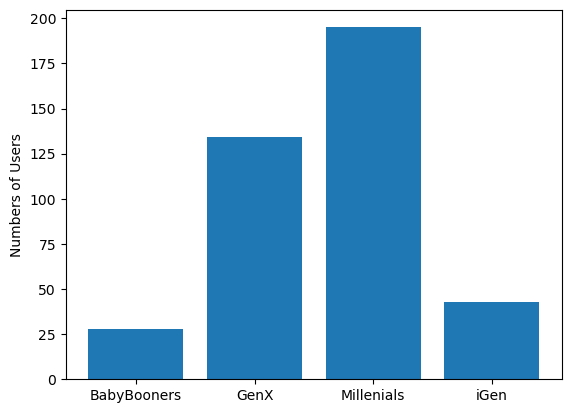

In [82]:
plt.bar(age_cat.index.values, age_cat['Age'])
plt.ylabel('Numbers of Users')
plt.show()

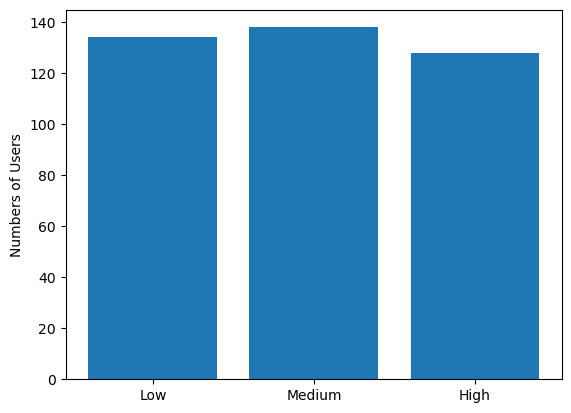

In [83]:
plt.bar(inc_cat.index.values, inc_cat['Age'])
plt.ylabel('Numbers of Users')
plt.show()

## Model Building

In [84]:
dt.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'Age Category', 'Income Category'],
      dtype='object')

In [86]:
#split data into features and targets 

x= dt[['Gender', 'Age', 'EstimatedSalary']]
y= dt['Purchased']

#train_test_spli
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=42)

## Using Naive Bayes

In [87]:
#fitting Naive Bayes to the training set

from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [88]:
#prediciting the test set results
y_pred=classifier.predict(x_test)

In [89]:
#evealuating performance
from sklearn import metrics

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))


Accuracy:  0.925
Precision:  0.975
Recall:  0.8297872340425532


## ROC CURVE

In [90]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc= auc(fpr,tpr)
print('ROC','AUC', roc_auc)

ROC AUC 0.9080443019527833


In [91]:
#plotting the confusion matrix
def conftab(test, pred, imagename):
    confmatr=metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatr)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)

    plt.show()
    print(confmatr)

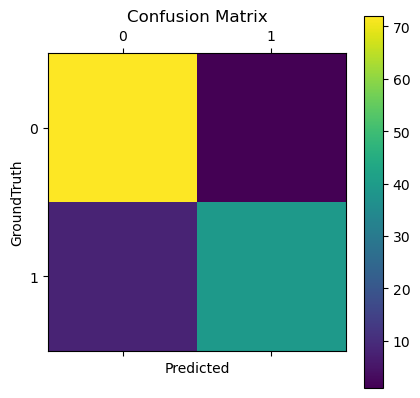

[[72  1]
 [ 8 39]]


In [92]:
conftab(y_test,y_pred, 'conf')

## Assignment

Comparing with engineered features to see if it makes our model accuracy better

In [95]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   User ID          400 non-null    int64   
 1   Gender           400 non-null    int32   
 2   Age              400 non-null    int64   
 3   EstimatedSalary  400 non-null    int64   
 4   Purchased        400 non-null    int64   
 5   Age Category     400 non-null    object  
 6   Income Category  400 non-null    category
dtypes: category(1), int32(1), int64(4), object(1)
memory usage: 17.8+ KB


In [96]:
#converting the categorical into numeric
le= LabelEncoder()
#invoking fit_transform method on object
dt['Age Category']=le.fit_transform(dt['Age Category'])
dt['Age Category'].value_counts()

2    195
1    134
3     43
0     28
Name: Age Category, dtype: int64

In [97]:
dt['Income Category'].value_counts()

Medium    138
Low       134
High      128
Name: Income Category, dtype: int64

In [98]:
#for income
dt['Income Category']=le.fit_transform(dt['Income Category'])
dt['Income Category'].value_counts()

2    138
1    134
0    128
Name: Income Category, dtype: int64

In [99]:
#Comparing with analysis done with the engineered features

#split data into features and targets 

x1= dt[['Gender', 'Age', 'EstimatedSalary', 'Age Category', 'Income Category']]
y= dt['Purchased']

#train_test_spli
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1= train_test_split(x1,y, test_size=0.3, random_state=42)

In [100]:
#fitting Naive Bayes to the training set

from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(x_train1, y_train1)

GaussianNB()

In [101]:
#prediciting the test set results
y_pred2=classifier.predict(x_test1)

In [102]:
#evealuating performance
from sklearn import metrics

print('Accuracy: ', metrics.accuracy_score(y_test1, y_pred2))
print('Precision: ', metrics.precision_score(y_test1, y_pred2))
print('Recall: ', metrics.recall_score(y_test1, y_pred2))


Accuracy:  0.95
Precision:  0.9767441860465116
Recall:  0.8936170212765957


## ROC Curve with engineered features 

In [103]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test1, y_pred2)
roc_auc= auc(fpr,tpr)
print('ROC','AUC', roc_auc)

ROC AUC 0.9399591955698046


We can see that adding the engineered features have improved our model significantly

In [106]:
#plotting the confusion matrix
def conftab2(test, pred, newimage):
    confmatr2=metrics.confusion_matrix(y_test1, y_pred2)
    plt.matshow(confmatr2)
    plt.title('Confusion Matrix with EF')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(newimage)

    plt.show()
    print(confmatr2)

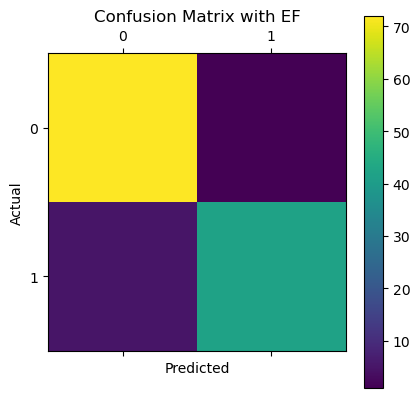

[[72  1]
 [ 5 42]]


In [107]:
conftab2(y_test1,y_pred2, 'confused')

# It definitely improves our model 